### Hierarchical Clustering

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("dataset/Mall_customers.csv")

In [93]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [95]:
unique = df['Gender'].unique()
to_int = {date: i for i, date in enumerate(unique)}
df['Gender'] = df['Gender'].map(to_int)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [97]:
df_train = df.iloc[:150 , :]
df_test = df.iloc[150: , :]

In [98]:
X = df_train.iloc[:, 3:5].values
X

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25,  5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30,  4],
       [30, 73],
       [33,  4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51

In [99]:
X_df = df_train
X_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
145,146,0,28,77,97
146,147,0,48,77,36
147,148,1,32,77,74
148,149,1,34,78,22


In [100]:
def euclidean(p1, p2):
    return np.linalg.norm(p1 - p2)

def cluster_distance(X, c1, c2, method='average'):
    points1 = X[list(c1)]
    points2 = X[list(c2)]

    if method == 'single':
        return np.min([euclidean(p1, p2) for p1 in points1 for p2 in points2])
    elif method == 'complete':
        return np.max([euclidean(p1, p2) for p1 in points1 for p2 in points2])
    elif method == 'average':
        return np.mean([euclidean(p1, p2) for p1 in points1 for p2 in points2])
    elif method == 'ward':
        # Ward linkage uses increase in SSE
        mean1 = np.mean(points1, axis=0)
        mean2 = np.mean(points2, axis=0)
        combined = np.concatenate([points1, points2], axis=0)
        mean_combined = np.mean(combined, axis=0)
        sse1 = np.sum((points1 - mean1) ** 2)
        sse2 = np.sum((points2 - mean2) ** 2)
        sse_combined = np.sum((combined - mean_combined) ** 2)
        return sse_combined - (sse1 + sse2)
    else:
        raise ValueError("Unknown linkage method")


In [101]:
def hierarchical_clustering(X, method='average'):
    X = np.array(X)
    clusters = [{i} for i in range(len(X))]
    history = []
    current_id = len(X)

    while len(clusters) > 1:
        min_dist = float('inf')
        pair_to_merge = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(X, clusters[i], clusters[j], method)
                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i, j)

        i, j = pair_to_merge
        c1, c2 = clusters[i], clusters[j]
        history.append((c1, c2, min_dist, current_id))
        new_cluster = c1.union(c2)

        # update clusters
        clusters = [clusters[k] for k in range(len(clusters)) if k not in [i, j]]
        clusters.append(new_cluster)
        current_id += 1

    return history


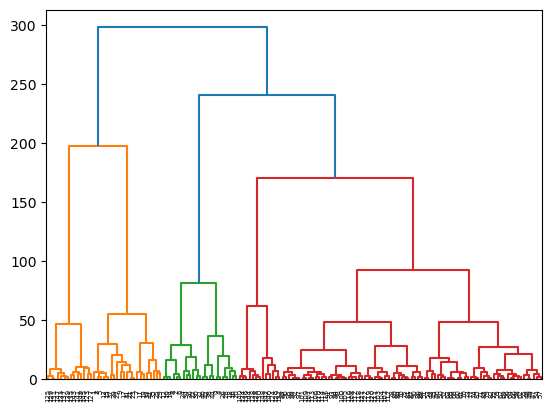

In [102]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

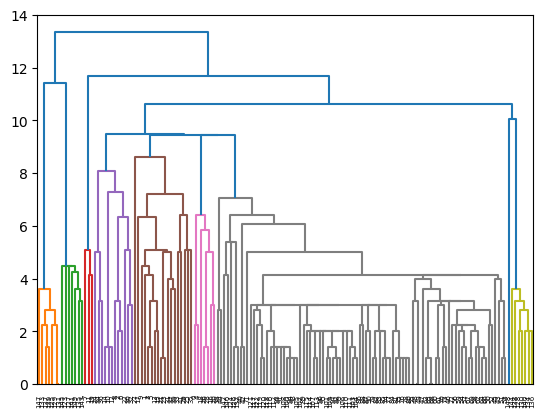

In [103]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))

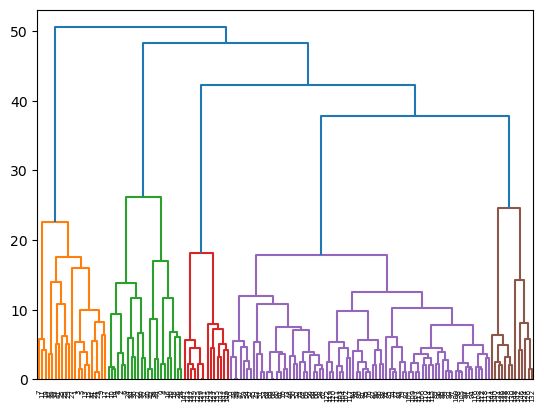

In [104]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))

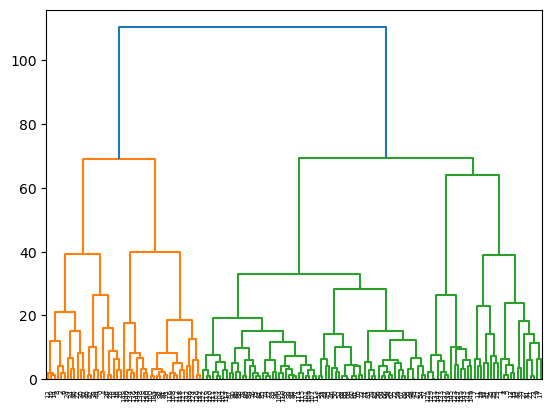

In [105]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))

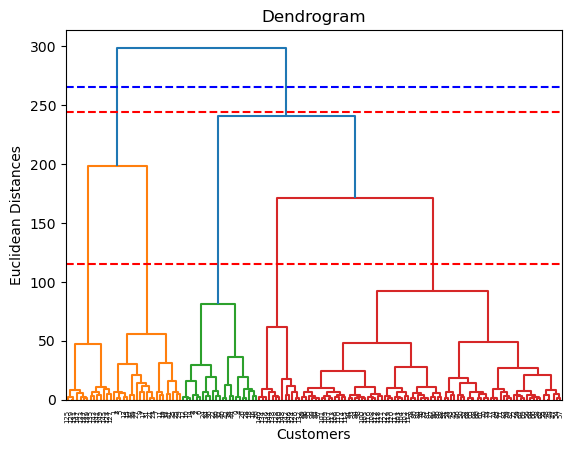

In [106]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=394, color='b', linestyle='--')
plt.axhline(y=265, color='b', linestyle='--')
plt.axhline(y=244, color='r', linestyle='--')
plt.axhline(y=115, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [107]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

class AgglomerativeClustering:
    def __init__(self, n_clusters=2, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage

    def fit_predict(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.arange(n_samples)
        self.clusters = {i: [i] for i in range(n_samples)}
        self.X = X

        distances = squareform(pdist(X, metric='euclidean'))  
        np.fill_diagonal(distances, np.inf)

        while len(self.clusters) > self.n_clusters:
            min_dist = np.inf
            to_merge = None

            keys = list(self.clusters.keys())
            for i in range(len(keys)):
                for j in range(i + 1, len(keys)):
                    c1, c2 = keys[i], keys[j]
                    d = self._linkage_distance(self.clusters[c1], self.clusters[c2])
                    if d < min_dist:
                        min_dist = d
                        to_merge = (c1, c2)

            c1, c2 = to_merge
            new_cluster = self.clusters[c1] + self.clusters[c2]
            new_key = min(c1, c2)
            del self.clusters[c1]
            del self.clusters[c2]
            self.clusters[new_key] = new_cluster

        final_labels = np.zeros(n_samples, dtype=int)
        for cluster_id, points in enumerate(self.clusters.values()):
            for point in points:
                final_labels[point] = cluster_id

        return final_labels

    def _linkage_distance(self, cluster1, cluster2):
        points1 = self.X[cluster1]
        points2 = self.X[cluster2]
        combined = np.vstack([points1, points2])
        center1 = points1.mean(axis=0)
        center2 = points2.mean(axis=0)
        center_combined = combined.mean(axis=0)

        ss1 = np.sum((points1 - center1)**2)
        ss2 = np.sum((points2 - center2)**2)
        ss_combined = np.sum((combined - center_combined)**2)

        return ss_combined - (ss1 + ss2)


In [108]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = model.fit_predict(X)

In [109]:
labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0])

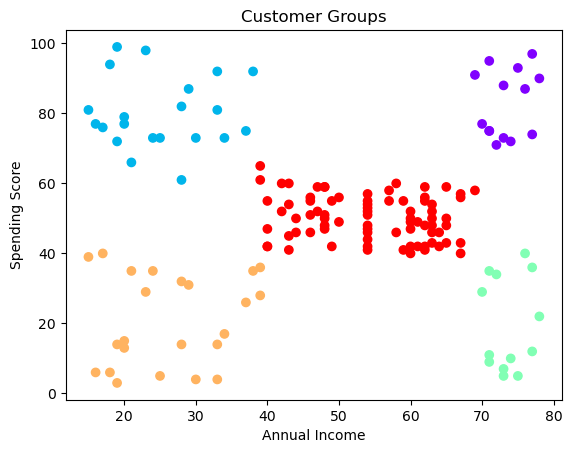

In [110]:
plt.scatter(X[:, 0], X[:, 1], c= labels, cmap = 'rainbow')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [111]:
X_test = df_test.iloc[:, 3:5].values
X_test

array([[ 78,  17],
       [ 78,  88],
       [ 78,  20],
       [ 78,  76],
       [ 78,  16],
       [ 78,  89],
       [ 78,   1],
       [ 78,  78],
       [ 78,   1],
       [ 78,  73],
       [ 79,  35],
       [ 79,  83],
       [ 81,   5],
       [ 81,  93],
       [ 85,  26],
       [ 85,  75],
       [ 86,  20],
       [ 86,  95],
       [ 87,  27],
       [ 87,  63],
       [ 87,  13],
       [ 87,  75],
       [ 87,  10],
       [ 87,  92],
       [ 88,  13],
       [ 88,  86],
       [ 88,  15],
       [ 88,  69],
       [ 93,  14],
       [ 93,  90],
       [ 97,  32],
       [ 97,  86],
       [ 98,  15],
       [ 98,  88],
       [ 99,  39],
       [ 99,  97],
       [101,  24],
       [101,  68],
       [103,  17],
       [103,  85],
       [103,  23],
       [103,  69],
       [113,   8],
       [113,  91],
       [120,  16],
       [120,  79],
       [126,  28],
       [126,  74],
       [137,  18],
       [137,  83]], dtype=int64)

In [113]:
labels_pred = model.fit_predict(X_test)

In [114]:
labels_pred

array([2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 3, 4, 1, 4, 3,
       4, 0, 4, 0, 4, 0])